# Sesión 2 Apartado 1: Modelos Supervisados

Objetivo: Presentar modelos de clasificación binaria: Regresión logística, Random Forest, SVM y KNN. Cada sección incluye una breve explicación, implementación y una pequeña prueba.

In [39]:
# Imports y generación de dataset
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('Shapes:', X_train.shape, X_test.shape)

Shapes: (700, 2) (300, 2)


## Regresión Logística

Modelo lineal para clasificación probabilística. Predice la probabilidad de la clase positiva mediante la función sigmoide; la decisión se toma con un umbral (p.ej. 0.5). Es un buen baseline: rápido, interpretable (coeficientes) y funciona bien cuando la relación entre features y la etiqueta es aproximadamente lineal.

Pros: interpretable, eficiente, pocos hiperparámetros. 
Contras: no captura fácilmente relaciones no lineales sin transformar features.

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Accuracy (Logistic Regression):', accuracy_score(y_test, y_pred))

Accuracy (Logistic Regression): 0.8966666666666666


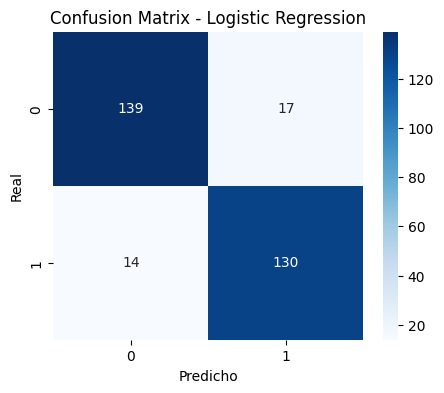

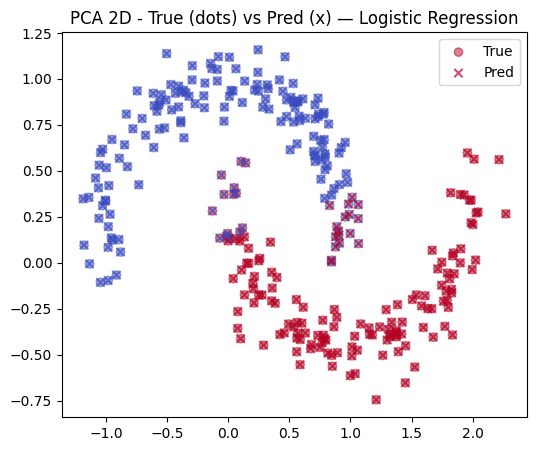

Accuracy (Logistic Regression): 0.8966666666666666


In [41]:
# Visualización: Logistic Regression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.decomposition import PCA

# Predicciones ya calculadas como y_pred en la celda anterior
# En caso de ser re-ejecutado, recomputar:
y_pred_lr = lr.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

# PCA 2D para visualizar predicciones
plt.figure(figsize=(6,5))
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap='coolwarm', alpha=0.5, label='True')
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred_lr, cmap='coolwarm', marker='x', alpha=0.7, label='Pred')
plt.title('PCA 2D - True (dots) vs Pred (x) — Logistic Regression')
plt.legend(['True','Pred'])
plt.show()

print('Accuracy (Logistic Regression):', accuracy_score(y_test, y_pred_lr))

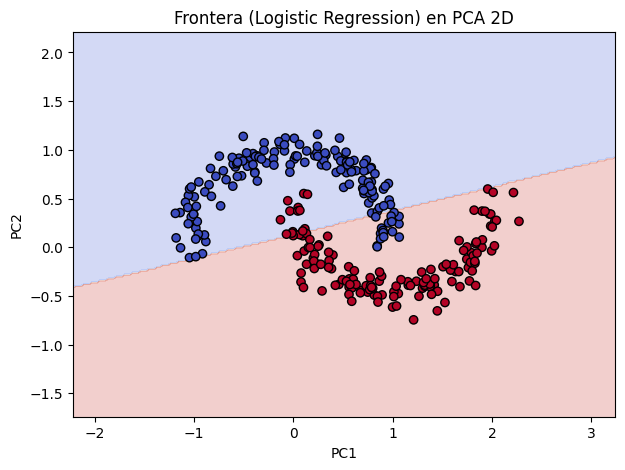

In [42]:
# Frontera de decisión — Logistic Regression (visualización en PCA 2D)
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

# Crear malla
x_min, x_max = X_train[:,0].min() - 1, X_train[:,0].max() + 1
y_min, y_max = X_train[:,1].min() - 1, X_train[:,1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(7,5))
plt.contourf(xx, yy, Z, alpha=0.25, cmap='coolwarm')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap='coolwarm', edgecolor='k')
plt.title('Frontera (Logistic Regression) en PCA 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Notas: entrenamos un modelo sobre la proyección PCA para visualizar una aproximación de la frontera.

## Random Forest

Ensamble de árboles de decisión mediante bagging. Construye muchos árboles sobre muestras diferentes del entrenamiento y promedia sus predicciones. Reduce la varianza frente a un árbol único y maneja relaciones no lineales y interacciones entre variables.

Pros: robusto, maneja datos heterogéneos, poca preparación de features, ofrece importancia de features.
Contras: menos interpretable que un árbol único, puede ser más lento y usar más memoria.

In [43]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Accuracy (Random Forest):', accuracy_score(y_test, y_pred))

Accuracy (Random Forest): 1.0


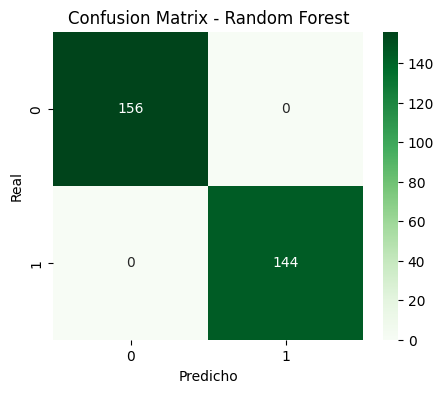

Accuracy (Random Forest): 1.0


In [45]:
# Visualización: Random Forest
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.decomposition import PCA

# Predicciones rf
y_pred_rf = rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

print('Accuracy (Random Forest):', accuracy_score(y_test, y_pred_rf))

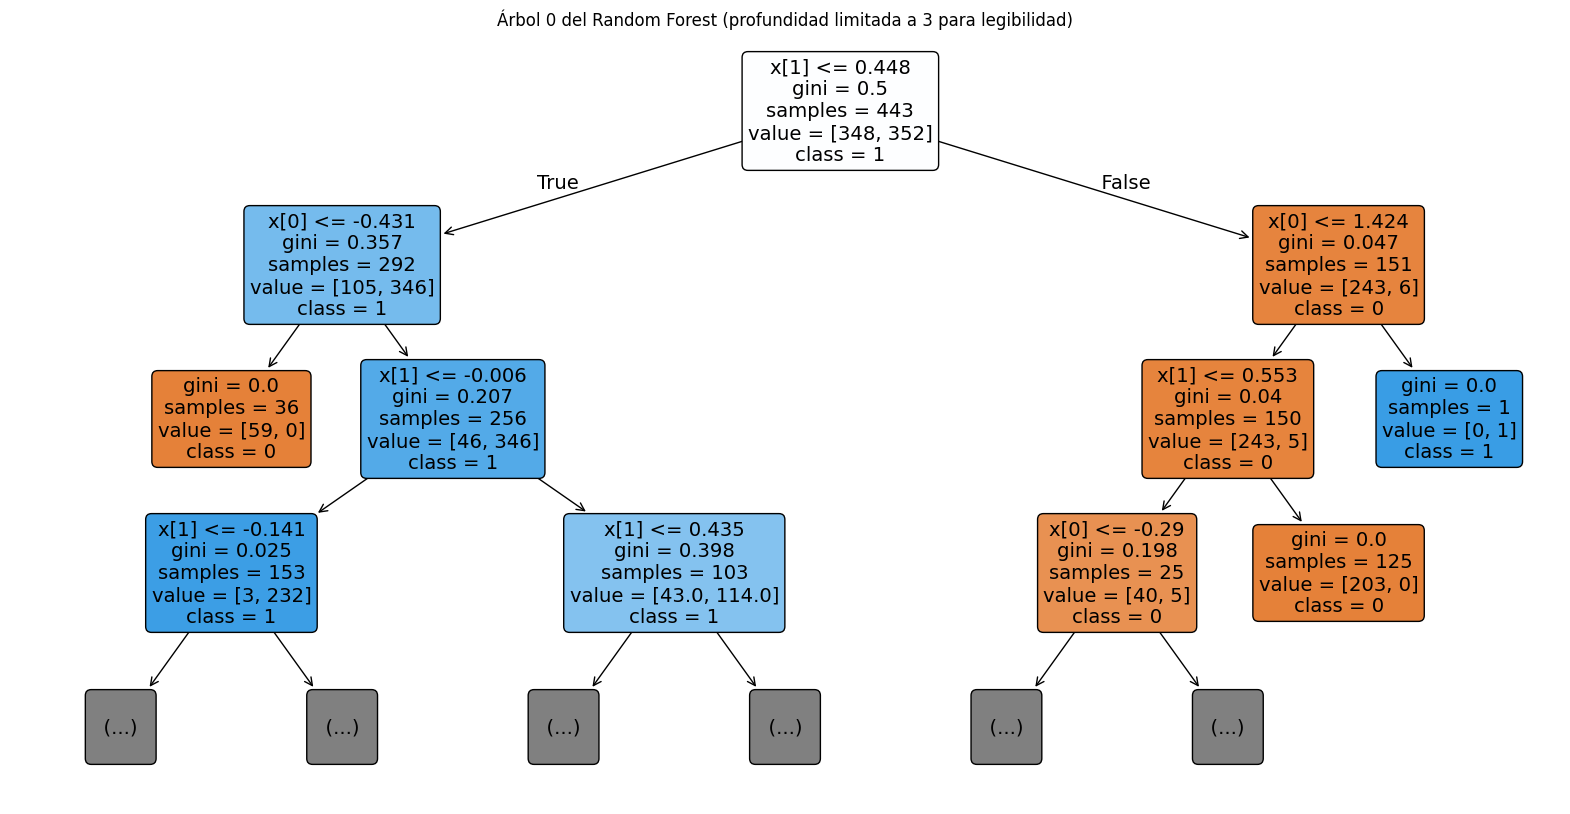

Muestra 246: hoja: 35
Nodo recorrido: [ 0 26 27 35]
---
Muestra 263: hoja: 5
Nodo recorrido: [0 1 3 4 5]
---
Muestra 40: hoja: 5
Nodo recorrido: [0 1 3 4 5]
---
Muestra 71: hoja: 35
Nodo recorrido: [ 0 26 27 35]
---
Muestra 147: hoja: 35
Nodo recorrido: [ 0 26 27 35]
---
Reglas (resumidas, max_depth=3):

|--- feature_1 <= 0.45
|   |--- feature_0 <= -0.43
|   |   |--- class: 0.0
|   |--- feature_0 >  -0.43
|   |   |--- feature_1 <= -0.01
|   |   |   |--- feature_1 <= -0.14
|   |   |   |   |--- class: 1.0
|   |   |   |--- feature_1 >  -0.14
|   |   |   |   |--- truncated branch of depth 4
|   |   |--- feature_1 >  -0.01
|   |   |   |--- feature_1 <= 0.43
|   |   |   |   |--- truncated branch of depth 4
|   |   |   |--- feature_1 >  0.43
|   |   |   |   |--- class: 1.0
|--- feature_1 >  0.45
|   |--- feature_0 <= 1.42
|   |   |--- feature_1 <= 0.55
|   |   |   |--- feature_0 <= -0.29
|   |   |   |   |--- class: 0.0
|   |   |   |--- feature_0 >  -0.29
|   |   |   |   |--- truncated branch 

In [46]:
# Visualización adicional: árbol individual y decision paths (Random Forest)
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np

# Selecciona el estimador 0 del ensemble
estimator = rf.estimators_[0]

# Plot del árbol (puede ser grande)
plt.figure(figsize=(20,10))
tree.plot_tree(estimator, filled=True, rounded=True, feature_names=None, class_names=['0','1'], max_depth=3)
plt.title('Árbol 0 del Random Forest (profundidad limitada a 3 para legibilidad)')
plt.show()

# Decision path para algunas muestras de X_test
sample_idx = np.random.choice(np.arange(X_test.shape[0]), size=5, replace=False)
paths = estimator.decision_path(X_test[sample_idx])

for i, idx in enumerate(sample_idx):
    node_indicator = estimator.decision_path(X_test[idx].reshape(1, -1))
    leave_id = estimator.apply(X_test[idx].reshape(1, -1))
    print(f"Muestra {idx}: hoja: {leave_id[0]}")
    # nodes touched
    node_index = node_indicator.indices[node_indicator.indptr[0]:node_indicator.indptr[1]]
    print('Nodo recorrido:', node_index)
    print('---')

# Nota: para ver visualmente todos los nodos y reglas se puede usar export_text
from sklearn.tree import export_text
r = export_text(estimator, max_depth=3)
print('Reglas (resumidas, max_depth=3):\n')
print(r)

## SVM

Busca el hiperplano que maximiza el margen entre clases. Con el "kernel trick" puede separar datos no lineales proyectándolos a espacios de mayor dimensión.

Pros: eficaz en espacios de alta dimensión, flexible con kernels.
Contras: sensible a la escala de features, puede ser lento en datasets grandes y requiere ajustar el parámetro C y el kernel.

In [47]:
from sklearn.svm import SVC

svm = SVC(probability=True)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print('Accuracy (SVM):', accuracy_score(y_test, y_pred))

Accuracy (SVM): 1.0


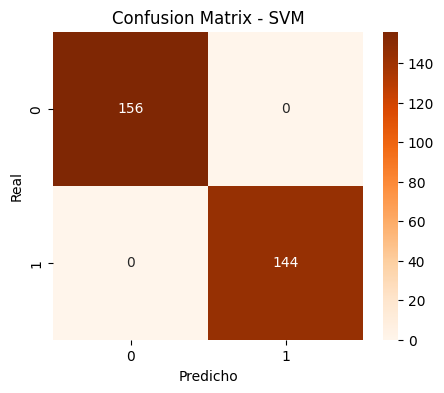

Accuracy (SVM): 1.0


In [49]:
# Visualización: SVM
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.decomposition import PCA

# Predicciones svm
y_pred_svm = svm.predict(X_test)

cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

print('Accuracy (SVM):', accuracy_score(y_test, y_pred_svm))

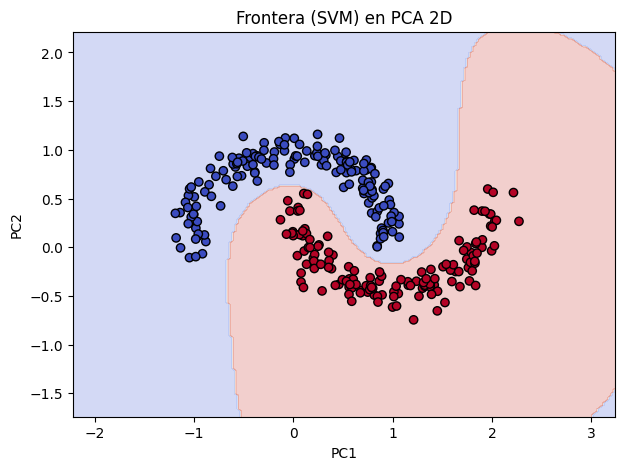

In [50]:
# Frontera de decisión — SVM (visualización en PCA 2D)
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt


# Crear malla
x_min, x_max = X_train[:,0].min() - 1, X_train[:,0].max() + 1
y_min, y_max = X_train[:,1].min() - 1, X_train[:,1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(7,5))
plt.contourf(xx, yy, Z, alpha=0.25, cmap='coolwarm')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap='coolwarm', edgecolor='k')
plt.title('Frontera (SVM) en PCA 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Notas: entrenamos un SVM sobre la proyección PCA para visualizar la frontera en 2D.


## KNN

Para predecir, busca los k vecinos más próximos en el conjunto de entrenamiento y asigna la clase por mayoría. Es un método "lazy" (no hay entrenamiento real).

Pros: simple, no asume forma de la frontera de decisión.
Contras: sensible a la escala y a ruido, puede ser lento en predicción para datasets grandes y requiere elección de k y de la métrica de distancia.

In [51]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Accuracy (KNN):', accuracy_score(y_test, y_pred))

Accuracy (KNN): 1.0


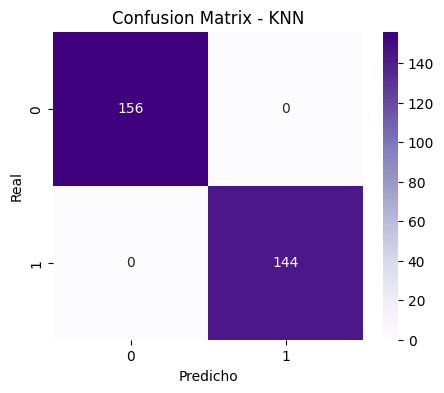

Accuracy (KNN): 1.0


In [52]:
# Visualización: KNN
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.decomposition import PCA

# Predicciones knn
y_pred_knn = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

print('Accuracy (KNN):', accuracy_score(y_test, y_pred_knn))